In [23]:
from fbprophet import Prophet

import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')

In [13]:
df = pd.read_csv('/kaggle/input/new-call-center/Data Analyst _ Sample Data _HDM - call-data-udpated.csv')
df.head()

In [124]:
# shape of the data
df.shape

(24623, 16)

In [125]:
df['Call Id'] # --> uniquely identified id

0        26807
1        26808
2        26809
3        26810
4        26811
         ...  
24618    51694
24619    51695
24620    51696
24621    51697
24622    51698
Name: Call Id, Length: 24623, dtype: int64

In [126]:
df['Lead Id'] # --> uniquely identified column

0        410987
1        410986
2        410985
3        410984
4        410981
          ...  
24618    452649
24619    452648
24620    452647
24621    452646
24622    452646
Name: Lead Id, Length: 24623, dtype: int64

In [127]:
df['Campaign ID'] # --> uniquely identified column

0        930228
1        930228
2        930228
3        930228
4        930228
          ...  
24618    930270
24619    930270
24620    930270
24621    930270
24622    930270
Name: Campaign ID, Length: 24623, dtype: int64

In [128]:
df['Advertiser Id'] # --> uniquely identified column

0        1883
1        1883
2        1883
3        1883
4        1883
         ... 
24618    1883
24619    1883
24620    1883
24621    1883
24622    1883
Name: Advertiser Id, Length: 24623, dtype: int64

In [129]:
df['Hid'] # --> uniquely identified column with different h ids

0         40831aceu6850re1ece43deeqf20a6o
1         3dc489fbg6850pe1ece43deewf20a6v
2         92d7bfbag6850se1ece43deevf20a6y
3         3a9872eem6850oe1ece43deetf20a6m
4         3dde873bx6850je1ece43deehf20a6u
                       ...               
24618    d449d4aewcze1ec687663hcne4373a65
24619    43d96decjcle1ec687663zcnf55dce0f
24620    ff5897edxcwe1ec687663zcva2756b59
24621    b485f83fjcle1ec687663kcy54cfacf3
24622    b485f83fjcle1ec687663kcy54cfacf3
Name: Hid, Length: 24623, dtype: object

In [130]:
# its a category column in which we have four categories
# so we can see major values in no answer and in progress

df['Call Status'].value_counts()

no-answer      16042
completed       8454
in-progress       85
failed            42
Name: Call Status, dtype: int64

In [131]:
# there's no missing values in this column
df['Call Status'].isna().sum()

0

<AxesSubplot:>

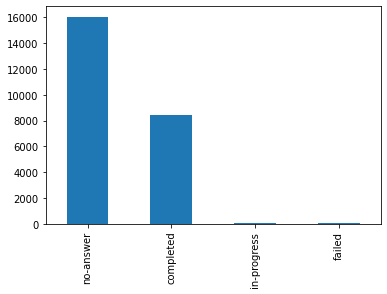

In [132]:
# distribution of column
df['Call Status'].value_counts().plot(kind = 'bar')

In [133]:
# its a category column and we have 22 differnent categories into it
df['Lead Status'].value_counts()

No Answer                 6478
Not Interested            4916
Busy                      3743
Interested                3451
Not Reachable             1443
Voice Issue               1208
Invalid Number             785
Language Barrier           657
Bought Another Product     479
Call Back                  452
Already Bought             340
Already Verified           240
Opt Out                    107
Already Buy/ Bought         87
Failed                      81
Out of Geo Location         58
Not Eligible - Income       53
Not Eligible - Age          16
Hung-up                     10
Duplicate                    9
Status26                     9
Ringing                      1
Name: Lead Status, dtype: int64

In [134]:
# there are 0 missing values
df['Lead Status'].isna().sum()

0

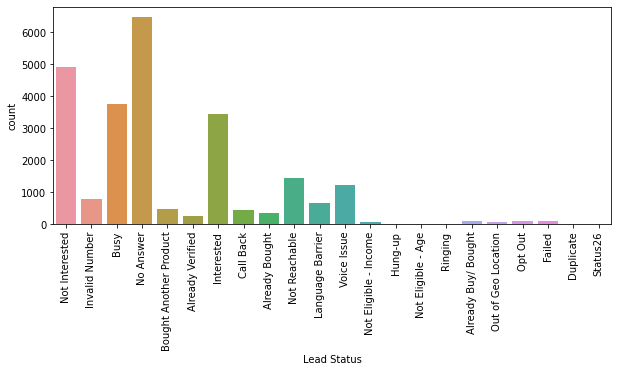

In [135]:
# distribution of all the categories
plt.figure(figsize = (10,4))
sns.countplot(x = 'Lead Status', data = df)
plt.xticks(rotation = 90)
plt.show()

In [136]:
df['Agent Duration(seconds)'] # numeric column which have values between 0 - 495

0         8
1        51
2         9
3        45
4        45
         ..
24618    30
24619    34
24620    79
24621    16
24622    51
Name: Agent Duration(seconds), Length: 24623, dtype: int64

In [137]:
df['Agent Duration(seconds)'].isna().sum() # --> no missing values

0

In [138]:
# 5 number summary
df['Agent Duration(seconds)'].describe()
# 75% values till 48 that means we have some outlier in the data

count    24623.000000
mean        35.938432
std         26.882256
min          0.000000
25%         17.000000
50%         33.000000
75%         48.000000
max        495.000000
Name: Agent Duration(seconds), dtype: float64

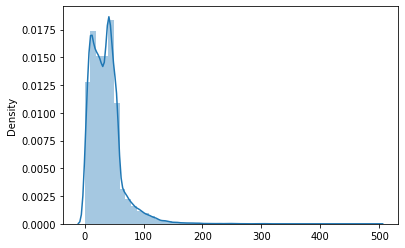

In [139]:
sns.distplot(x = df['Agent Duration(seconds)'])
plt.show()

its a highly right skewded data


In [140]:
df['Customer Duration(seconds)'].isna().sum() # --> no missing values

0

In [141]:
# 5 number summary
df['Customer Duration(seconds)'].describe()
# 75% values till 18 that means we have some outlier in the data

count    24623.000000
mean        12.986679
std         25.441664
min          0.000000
25%          0.000000
50%          0.000000
75%         18.000000
max        476.000000
Name: Customer Duration(seconds), dtype: float64

In [142]:
df['From Calling Number'] # clinet calling number

0        9.186570e+11
1        9.186570e+11
2        9.186570e+11
3        9.186570e+11
4        9.186570e+11
             ...     
24618    9.186570e+11
24619    9.186570e+11
24620    9.186570e+11
24621    9.186570e+11
24622    9.186570e+11
Name: From Calling Number, Length: 24623, dtype: float64

In [143]:
df['To Calling Number'] # customer calling number

0        +919552777764
1        +917275507242
2        +919430734094
3        +918349289209
4        +917054670061
             ...      
24618       7837713409
24619       9915515529
24620       9166733250
24621       9888255000
24622       9888255000
Name: To Calling Number, Length: 24623, dtype: object

<AxesSubplot:>

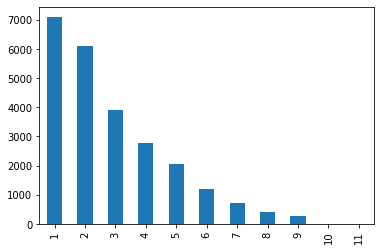

In [144]:
df['Attempt No'].value_counts().plot(kind = 'bar')

In [145]:
df['Created At'] # created entry

0       2024-04-01 11:35:19
1       2024-04-01 11:35:27
2       2024-04-01 11:36:19
3       2024-04-01 11:36:29
4       2024-04-01 11:37:14
                ...        
24618   2024-05-15 19:18:00
24619   2024-05-15 19:18:30
24620   2024-05-15 19:19:09
24621   2024-05-15 19:20:28
24622   2024-05-15 19:20:45
Name: Created At, Length: 24623, dtype: datetime64[ns]

In [146]:
df['Updated At'] # updated entry

0        2024-04-01 11:35:27
1        2024-04-01 11:36:19
2        2024-04-01 11:36:28
3        2024-04-01 11:37:15
4        2024-04-01 11:38:00
                ...         
24618    2024-05-15 19:18:31
24619    2024-05-15 19:19:09
24620    2024-05-15 19:20:29
24621    2024-05-15 19:20:45
24622    2024-05-15 19:21:36
Name: Updated At, Length: 24623, dtype: object

<AxesSubplot:>

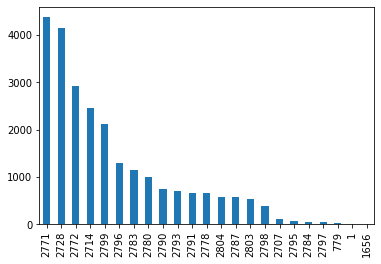

In [147]:
df['Agent Id'].value_counts().plot(kind = 'bar')

<AxesSubplot:>

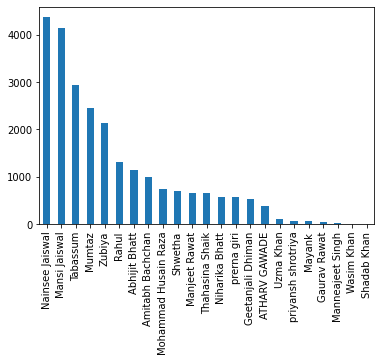

In [148]:
df['Agent Name'].value_counts().plot(kind = 'bar')

# Report Preparation
## Using the above data, we aim to prepare the following reports:
### 1. Campaign Performance Report:
* Metrics:
* Total calls (count of call_sid)
* Unique leads (count of distinct lead_id)
* Calls connected (count of call_status = "Answered")
* Unique calls connected (count of distinct lead_id where call_status = "Answered")
* Leads converted (count of call_status = "Interested")
* Qualified leads (count of leads meeting advertiser criteria)
* Leads lost (count of call_status = "Not Interested")
* Average agent call duration (average of Agent Call Duration)
* Average customer call duration (average of Customer Call Duration)
* Purpose: To evaluate the performance of each campaign and agent.


In [149]:
# Total calls (count of call_sid)
print('Total calls',df['Call Id'].count())

Total calls 24623


In [151]:
print('unique leads',df['Lead Id'].nunique())

unique leads 8278


In [152]:
print('Calls connected',df[df['Call Status']=='no-answer'][['Call Status']].count()[0])

Calls connected 16042


In [153]:
print('unique call connected ',df[df['Call Status']=='no-answer'][['Lead Id']].nunique()[0])

unique call connected  5504


In [154]:
print('Leads Converted',df[df['Lead Status']== 'Interested'][['Call Id']].count()[0])

Leads Converted 3451


In [155]:
print('Leads Lost',df[df['Lead Status']== 'Not Interested'][['Call Id']].count()[0])

Leads Lost 4916


In [156]:
print('Average agent call duration',np.round(df['Agent Duration(seconds)'].mean(),2))

Average agent call duration 35.94


In [157]:
print('Average customer call duration',np.round(df['Customer Duration(seconds)'].mean(),2))

Average customer call duration 12.99


~~~~~~~~~~ DISTRIBUTION OF CALL STATUS ~~~~~~~~~~~


<AxesSubplot:xlabel='Call Status', ylabel='count'>

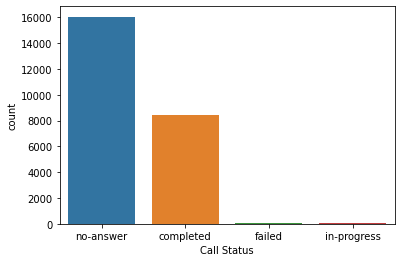

In [158]:
print(' Distribution of call status '.upper().center(50,'~'))
sns.countplot(x =  'Call Status', data = df)

In [159]:
print(' NUmber of calls per agent '.upper().center(50,'~'))
df.groupby('Agent Name')['Call Id'].count().sort_values(ascending = False)

~~~~~~~~~~~ NUMBER OF CALLS PER AGENT ~~~~~~~~~~~~


Agent Name
Nainsee Jaiswal         4372
Mansi Jaiswal           4134
Tabassum                2930
Mumtaz                  2453
Zubiya                  2128
Rahul                   1304
Abhijit Bhatt           1147
Amitabh Bachchan         999
Mohammad Husain Raza     750
Shwetha                  704
Manjeet Rawat            668
Thahasina Shaik          659
Niharika Bhatt           582
prerna giri              572
Geetanjali Dhiman        533
ATHARV GAWADE            386
Uzma Khan                104
priyansh shrotriya        65
Mayank                    57
Gaurav Rawat              44
Manneajeet Singh          27
Wasim Khan                 4
Shadab Khan                1
Name: Call Id, dtype: int64

In [160]:
print(' Calls connected per agent '.upper().center(50,'~'))
temp = df[df['Call Status']=='no-answer' ]
temp.groupby('Agent Name')['Call Id'].count().sort_values(ascending = False)

~~~~~~~~~~~ CALLS CONNECTED PER AGENT ~~~~~~~~~~~~


Agent Name
Nainsee Jaiswal         2839
Mansi Jaiswal           2568
Tabassum                1922
Mumtaz                  1520
Zubiya                  1491
Rahul                    829
Amitabh Bachchan         796
Abhijit Bhatt            710
Mohammad Husain Raza     497
Shwetha                  442
Manjeet Rawat            438
Thahasina Shaik          418
Geetanjali Dhiman        398
prerna giri              355
Niharika Bhatt           348
ATHARV GAWADE            254
Uzma Khan                 89
priyansh shrotriya        41
Mayank                    37
Gaurav Rawat              31
Manneajeet Singh          16
Wasim Khan                 2
Shadab Khan                1
Name: Call Id, dtype: int64

In [161]:
print(' Leads converted per agent '.upper().center(50,'~'))
temp = df[df['Lead Status'] == 'Interested']
temp.groupby('Agent Name')['Call Id'].count().sort_values(ascending = False)

~~~~~~~~~~~ LEADS CONVERTED PER AGENT ~~~~~~~~~~~~


Agent Name
Mansi Jaiswal           699
Nainsee Jaiswal         685
Mumtaz                  374
Tabassum                315
Rahul                   253
Zubiya                  248
Abhijit Bhatt           142
Amitabh Bachchan        117
Thahasina Shaik          99
Mohammad Husain Raza     97
Shwetha                  97
prerna giri              69
Manjeet Rawat            69
Niharika Bhatt           64
Geetanjali Dhiman        46
ATHARV GAWADE            31
Uzma Khan                15
priyansh shrotriya       14
Gaurav Rawat              8
Mayank                    5
Manneajeet Singh          4
Name: Call Id, dtype: int64

In [162]:
print(' average agent call duration '.upper().center(50,'~'))
np.round(df.groupby('Agent Name')['Agent Duration(seconds)'].mean(),2)

~~~~~~~~~~ AVERAGE AGENT CALL DURATION ~~~~~~~~~~~


Agent Name
ATHARV GAWADE           39.01
Abhijit Bhatt           46.93
Amitabh Bachchan        22.38
Gaurav Rawat            45.18
Geetanjali Dhiman       37.47
Manjeet Rawat           37.19
Manneajeet Singh        21.48
Mansi Jaiswal           37.16
Mayank                  35.51
Mohammad Husain Raza    35.13
Mumtaz                  35.49
Nainsee Jaiswal         36.53
Niharika Bhatt          45.14
Rahul                   38.80
Shadab Khan              4.00
Shwetha                 43.64
Tabassum                30.64
Thahasina Shaik         45.05
Uzma Khan               12.23
Wasim Khan              26.75
Zubiya                  30.56
prerna giri             37.69
priyansh shrotriya      38.68
Name: Agent Duration(seconds), dtype: float64

In [163]:
print(' average customer call duration '.upper().center(50,'~'))
np.round(df.groupby('Agent Name')['Customer Duration(seconds)'].mean(),2)

~~~~~~~~~ AVERAGE CUSTOMER CALL DURATION ~~~~~~~~~


Agent Name
ATHARV GAWADE           15.23
Abhijit Bhatt           18.74
Amitabh Bachchan         6.15
Gaurav Rawat            18.50
Geetanjali Dhiman       13.00
Manjeet Rawat            9.60
Manneajeet Singh         9.52
Mansi Jaiswal           13.62
Mayank                  14.09
Mohammad Husain Raza    12.73
Mumtaz                  13.94
Nainsee Jaiswal         13.04
Niharika Bhatt          18.53
Rahul                   16.03
Shadab Khan              0.00
Shwetha                 17.02
Tabassum                 9.83
Thahasina Shaik         17.55
Uzma Khan                4.08
Wasim Khan               9.25
Zubiya                   9.91
prerna giri             13.22
priyansh shrotriya      13.15
Name: Customer Duration(seconds), dtype: float64

## **Task completd for report preparation**
### **some of my suggestion for analysis**
* do EDA on this whole data
* study distribution of numberical columns - measure of central tendency and measure of dispersion.
* doing bivarite analysis can help us to get hidden insight
* advertiser id is mysterious column for me so i have to study it more that what it is so i can get advertising benefits on particular product as well

# Forecasting Objectives
## Based on the data, we aim to create the following forecasts:
**Call Volume Forecast:**
* Objective: Predict the total number of calls that will be made in the next 30 days based on historical data.

**Lead Conversion Forecast:**
* Objective: Estimate the number of leads that will be converted into interested prospects over the next 30 days.

**Agent Efficiency Forecast:**
* Objective: Predict agent performance metrics such as calls per hour, success rate, and average handling time.

**Resource Allocation Forecast:**
* Objective: Forecast the number of agents required to handle the expected call volume and maintain desired performance levels.

**Additional Forecasts:**
* You are encouraged to create any additional forecasts that you believe would provide valuable insights or improve our call center operations.


# Call Volume Forecast:

In [17]:
# Extract relevant columns
data = df[['Created At', 'Call Id']]

In [24]:
# Convert 'Created At' column to datetime
data['Created At'] = pd.to_datetime(data['Created At'])

In [25]:
# Aggregate data by day (or any other suitable time period)
data = data.groupby(pd.Grouper(key='Created At', freq='D')).size().reset_index(name='Call Volume')

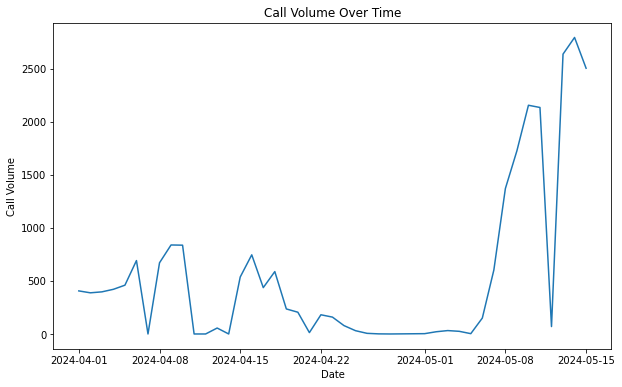

In [26]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.plot(data['Created At'], data['Call Volume'])
plt.title('Call Volume Over Time')
plt.xlabel('Date')
plt.ylabel('Call Volume')
plt.show()

In [27]:
# Rename columns for Prophet
data.columns = ['ds', 'y']

In [28]:
# Create and fit the model
model = Prophet()
model.fit(data)

Initial log joint probability = -14.3889
Iteration  1. Log joint probability =    18.7284. Improved by 33.1173.
Iteration  2. Log joint probability =    42.5453. Improved by 23.8169.
Iteration  3. Log joint probability =    43.1929. Improved by 0.647519.
Iteration  4. Log joint probability =    43.3776. Improved by 0.184724.
Iteration  5. Log joint probability =    43.4038. Improved by 0.026245.
Iteration  6. Log joint probability =    43.4082. Improved by 0.00435855.
Iteration  7. Log joint probability =    43.4447. Improved by 0.0364833.
Iteration  8. Log joint probability =    43.4478. Improved by 0.00309949.
Iteration  9. Log joint probability =    43.4592. Improved by 0.0114473.
Iteration 10. Log joint probability =    43.4711. Improved by 0.0119198.
Iteration 11. Log joint probability =    43.4798. Improved by 0.00870069.
Iteration 12. Log joint probability =    43.4824. Improved by 0.00252692.
Iteration 13. Log joint probability =    43.4849. Improved by 0.0025122.
Iteration 14.

In [29]:
# Make future predictions
future = model.make_future_dataframe(periods=30)  # Change the number of periods as needed
forecast = model.predict(future)

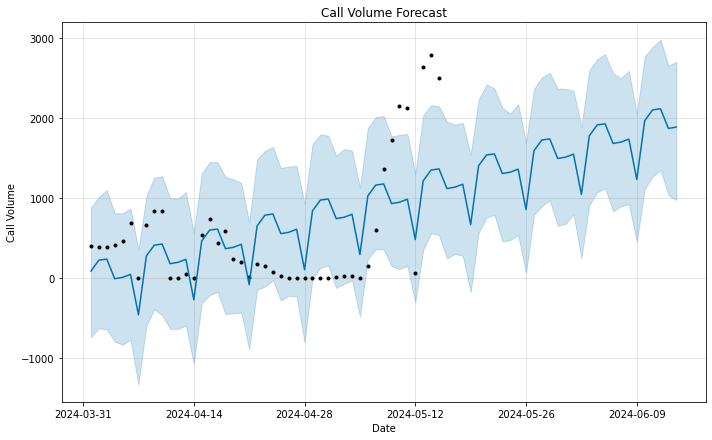

In [32]:
# Plot forecast
model.plot(forecast, xlabel='Date', ylabel='Call Volume')
plt.title('Call Volume Forecast')
plt.show()

## **Lead conversion forecast**

In [50]:
# Filter data for converted leads
converted_leads = df[df['Lead Status'] == 'Interested']

In [51]:
# Convert 'Created At' column to datetime
converted_leads['Created At'] = pd.to_datetime(converted_leads['Created At'])

In [52]:
# Aggregate data by day (or any other suitable time period)
converted_leads = converted_leads.groupby(pd.Grouper(key='Created At', freq='D')).size().reset_index(name='lead converted')

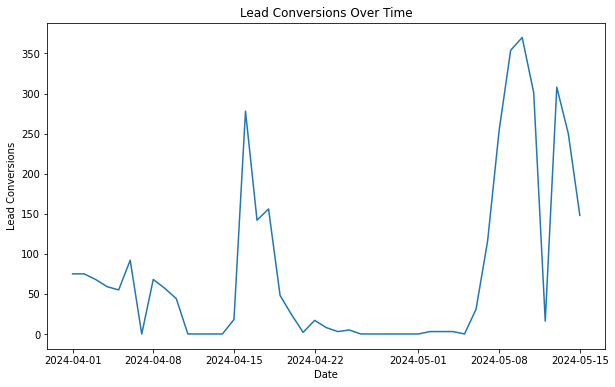

In [54]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.plot(converted_leads['Created At'], converted_leads['lead converted'])
plt.title('Lead Conversions Over Time')
plt.xlabel('Date')
plt.ylabel('Lead Conversions')
plt.show()

In [55]:
# Rename columns for Prophet
converted_leads.columns = ['ds', 'y']

In [56]:
# Create and fit the model
model = Prophet()
model.fit(converted_leads)

Initial log joint probability = -12.2625
Iteration  1. Log joint probability =    29.1074. Improved by 41.3699.
Iteration  2. Log joint probability =    39.0218. Improved by 9.91448.
Iteration  3. Log joint probability =    39.2389. Improved by 0.217099.
Iteration  4. Log joint probability =    39.2623. Improved by 0.0233446.
Iteration  5. Log joint probability =    39.4585. Improved by 0.196202.
Iteration  6. Log joint probability =    39.4984. Improved by 0.039906.
Iteration  7. Log joint probability =    39.5316. Improved by 0.0331964.
Iteration  8. Log joint probability =    39.5318. Improved by 0.000228802.
Iteration  9. Log joint probability =    39.5476. Improved by 0.0158414.
Iteration 10. Log joint probability =    39.5542. Improved by 0.00657059.
Iteration 11. Log joint probability =    39.5565. Improved by 0.00224717.
Iteration 12. Log joint probability =    39.5572. Improved by 0.000683728.
Iteration 13. Log joint probability =    39.5659. Improved by 0.00873384.
Iteration 

In [58]:
# Make future predictions
future = model.make_future_dataframe(periods=30) 
forecast = model.predict(future)

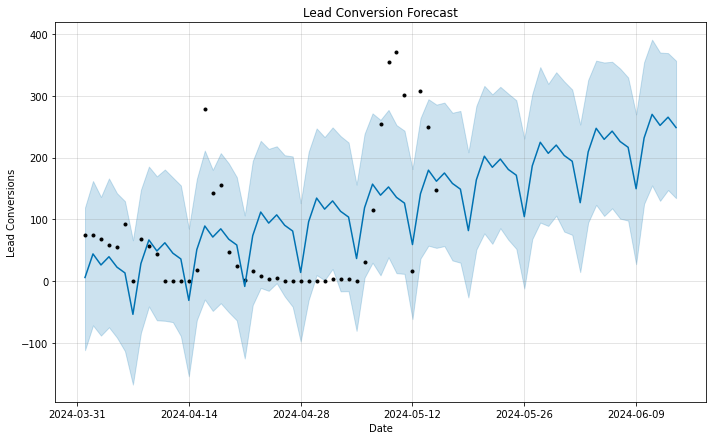

In [59]:
# Plot forecast
model.plot(forecast, xlabel='Date', ylabel='Lead Conversions')
plt.title('Lead Conversion Forecast')
plt.show()

## **Agent Efficiency Forecast:**


Initial log joint probability = -9.40708
Iteration  1. Log joint probability =    15.0964. Improved by 24.5035.
Iteration  2. Log joint probability =    36.2503. Improved by 21.1538.
Iteration  3. Log joint probability =    36.5509. Improved by 0.300671.
Iteration  4. Log joint probability =    36.7353. Improved by 0.184407.
Iteration  5. Log joint probability =    36.7853. Improved by 0.0500034.
Iteration  6. Log joint probability =    36.7907. Improved by 0.00532456.
Iteration  7. Log joint probability =    36.8012. Improved by 0.0105434.
Iteration  8. Log joint probability =    36.8194. Improved by 0.0182311.
Iteration  9. Log joint probability =    36.8295. Improved by 0.0100147.
Iteration 10. Log joint probability =    36.8376. Improved by 0.00813551.
Iteration 11. Log joint probability =    36.8419. Improved by 0.00433663.
Iteration 12. Log joint probability =    36.8431. Improved by 0.00121066.
Iteration 13. Log joint probability =    36.8446. Improved by 0.00147058.
Iteration 

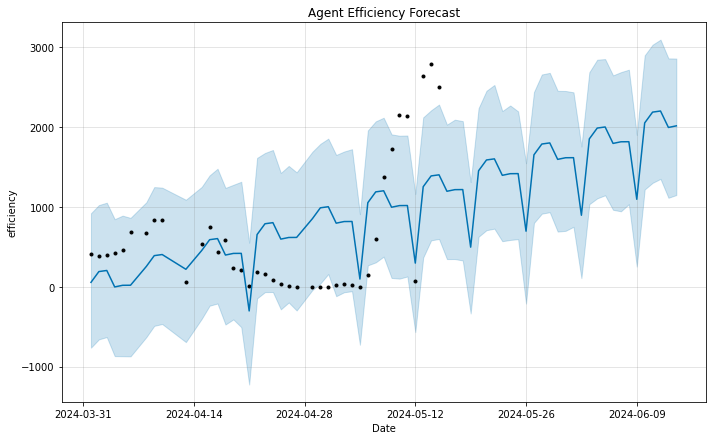

In [121]:
import pandas as pd
from fbprophet import Prophet
import matplotlib.pyplot as plt

# Assuming your DataFrame is named df
# Convert 'Created At' column to datetime
df['Created At'] = pd.to_datetime(df['Created At'])

# Group data by date and aggregate metrics (e.g., calls handled per day)
agent_efficiency = df.groupby(df['Created At'].dt.date).agg({
    'Call Id': 'count',  # Number of calls handled
    'Agent Duration(seconds)': 'mean'  # Average handling time
}).reset_index()

# Rename columns
agent_efficiency.rename(columns={'Created At': 'ds', 'Call Id': 'y', 'Agent Duration(seconds)': 'avg_handling_time'}, inplace=True)

# Create a Prophet model
model = Prophet()
model.fit(agent_efficiency)

# Make future predictions
future_dates = model.make_future_dataframe(periods=30)  # Forecasting 30 days into the future
forecast = model.predict(future_dates)

# Plot historical and forecasted data
fig, ax = plt.subplots(figsize=(10, 6))
model.plot(forecast, ax=ax)
plt.title('Agent Efficiency Forecast')
plt.xlabel('Date')
plt.ylabel('efficiency')
plt.grid(True)
plt.show()


## **Resource Allocation Forecast:**


Initial log joint probability = -8.66691
Iteration  1. Log joint probability =    18.9943. Improved by 27.6612.
Iteration  2. Log joint probability =    36.8512. Improved by 17.857.
Iteration  3. Log joint probability =    36.9257. Improved by 0.0745177.
Iteration  4. Log joint probability =    36.9911. Improved by 0.0653619.
Iteration  5. Log joint probability =    37.0322. Improved by 0.0411515.
Iteration  6. Log joint probability =    37.0639. Improved by 0.0316456.
Iteration  7. Log joint probability =    37.0812. Improved by 0.0173072.
Iteration  8. Log joint probability =    37.0834. Improved by 0.00221932.
Iteration  9. Log joint probability =    37.0926. Improved by 0.00913628.
Iteration 10. Log joint probability =    37.0938. Improved by 0.0012921.
Iteration 11. Log joint probability =    37.0965. Improved by 0.00264291.
Iteration 12. Log joint probability =    37.1001. Improved by 0.00364958.
Iteration 13. Log joint probability =     37.102. Improved by 0.00187527.
Iteration

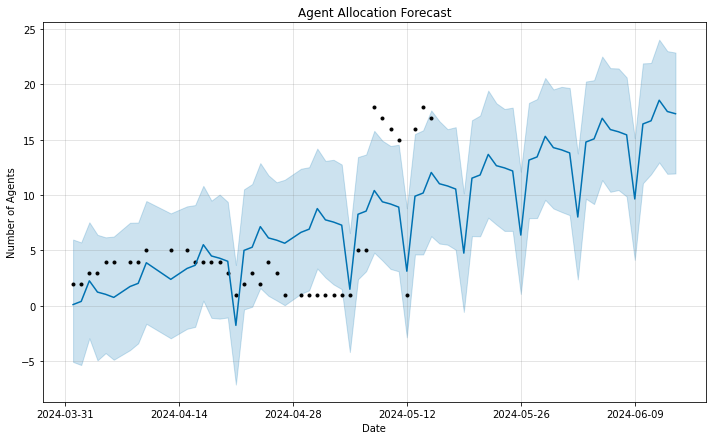

In [123]:
# Convert 'Created At' column to datetime
df['Created At'] = pd.to_datetime(df['Created At'])

# Group data by date and aggregate metrics
agent_usage = df.groupby(df['Created At'].dt.date).agg({
    'Call Id': 'count',  # Total number of calls
    'Agent Id': 'nunique'  # Number of unique agents
}).reset_index()

# Rename columns
agent_usage.rename(columns={'Created At': 'ds', 'Call Id': 'calls_handled', 'Agent Id': 'unique_agents'}, inplace=True)

# Create a new DataFrame for resource allocation forecasting
resource_allocation = agent_usage[['ds', 'unique_agents']].copy()
resource_allocation.rename(columns={'unique_agents': 'y'}, inplace=True)

# Create a Prophet model
model = Prophet()
model.fit(resource_allocation)

# Make future predictions
future_dates = model.make_future_dataframe(periods=30)  # Forecasting 30 days into the future
forecast = model.predict(future_dates)

# Plot historical and forecasted data
fig, ax = plt.subplots(figsize=(10, 6))
model.plot(forecast, ax=ax)
plt.title('Agent Allocation Forecast')
plt.xlabel('Date')
plt.ylabel('Number of Agents')
plt.grid(True)
plt.show()